In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn as sk
from sklearn.model_selection import train_test_split


There should be a question at hand that i'm trying to solve:
With Classification the problem I want to solve with the Medical Insurance Cost Dataset, is I want to guage if smokers typically get more charges with healthcare costs

In [120]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.width', 1000)

pd.set_option('display.max_colwidth', None)



In [121]:
lf = pd.read_csv("datasets/insurance.csv")
lf.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [122]:

df = pd.read_csv("datasets/insurance.csv", header = None, na_values=["?"])

df.columns

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [123]:
df = pd.read_csv("datasets/insurance.csv", na_values=["?"])

df.columns



print("\ndataframe head\n")
print(df.head())



dataframe head

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [124]:
print("\ndataframe null sum\n")
print(df.isna().sum())

df.columns




dataframe null sum

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [125]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [127]:
def splitdataset(df):
    X = df.drop(columns=['smoker'])
    y = df['smoker']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    return X, y, X_train, X_test, y_train, y_test

In [128]:
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [129]:

def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [130]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [131]:
from sklearn import tree
from sklearn.tree import plot_tree

# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

In [132]:
df['sex'] = df['sex'].map({ 'female': 0, 'male': 1 })
df['smoker'] = df['smoker'].map({ 'no': 0, 'yes': 1 })

df = pd.get_dummies(df, columns=['region'], drop_first=True)

Predicted values:
[0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
Confusion Matrix:  [[304   6]
 [  7  85]]
Accuracy :  96.76616915422885
Report :                precision    recall  f1-score   support

           0       0.98      

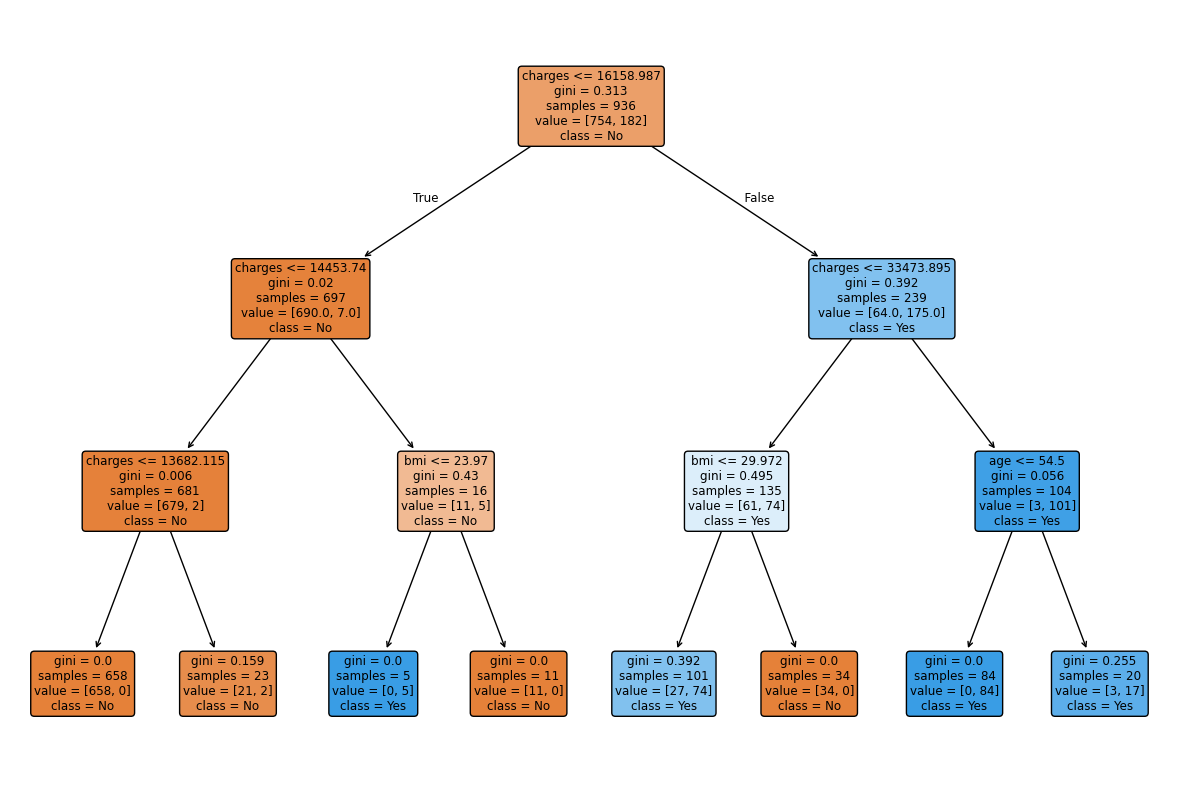

Predicted values:
[0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
Confusion Matrix:  [[304   6]
 [  5  87]]
Accuracy :  97.2636815920398
Report :                precision    recall  f1-score   support

           0       0.98      0

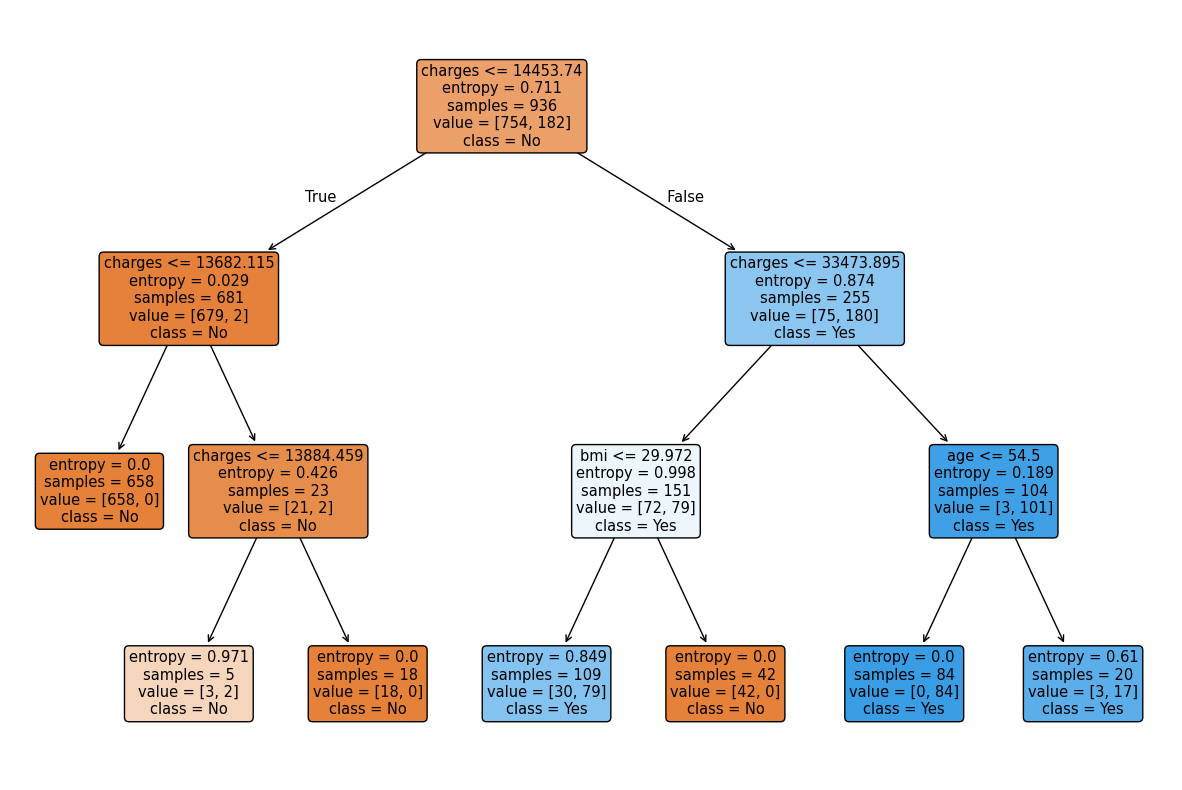

In [133]:
# Split dataset
X, y, X_train, X_test, y_train, y_test = splitdataset(df)

# Train using Gini
clf_gini = train_using_gini(X_train, y_train)
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
plot_decision_tree(clf_gini, feature_names=X.columns, class_names=['No','Yes'])

# Train using Entropy
clf_entropy = train_using_entropy(X_train, y_train)
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)
plot_decision_tree(clf_entropy, feature_names=X.columns, class_names=['No','Yes'])



In [134]:
X, y, X_train, X_test, y_train, y_test = splitdataset(df)


Predicted values:
[0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
Confusion Matrix:  [[304   6]
 [  7  85]]
Accuracy :  96.76616915422885
Report :                precision    recall  f1-score   support

           0       0.98      

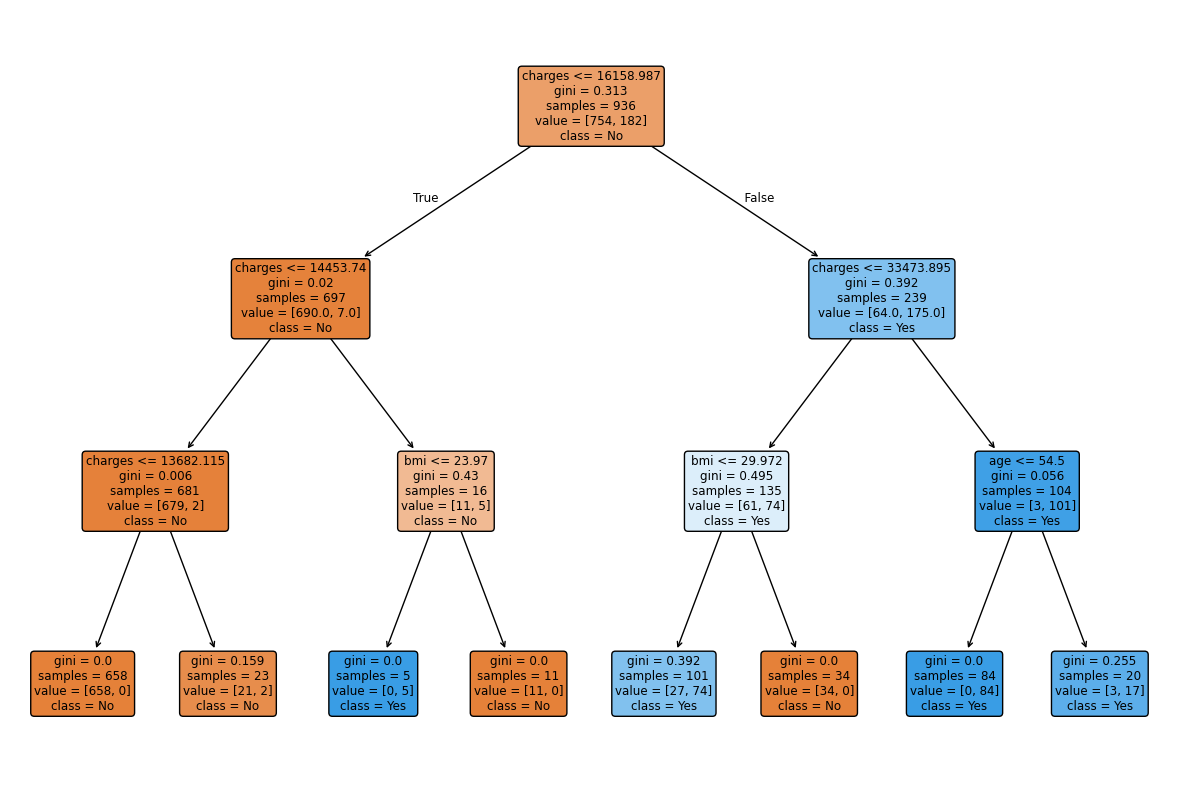

In [135]:
clf_gini = train_using_gini(X_train, y_train)
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


clf_entropy = train_using_entropy(X_train, y_train)
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


plot_decision_tree(clf_gini, feature_names=X.columns, class_names=['No','Yes'])

Charges vs Age


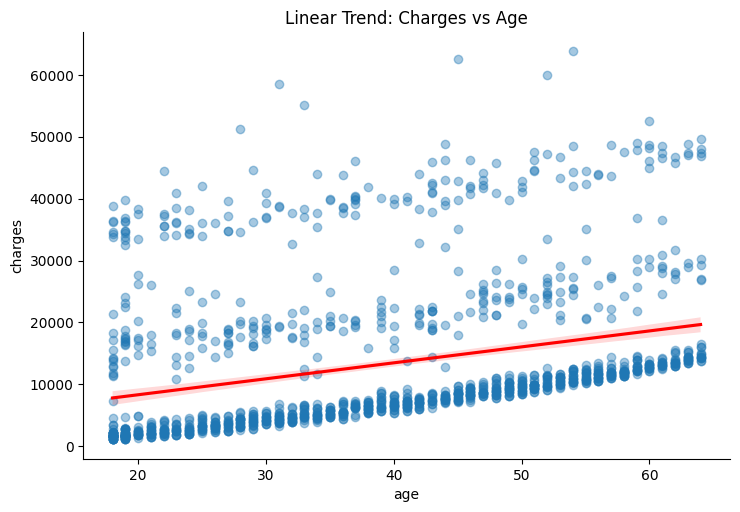

In [136]:
print("Charges vs Age")


sns.lmplot(x="age", y="charges", data=df, aspect=1.5,
           scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
plt.title("Linear Trend: Charges vs Age")
plt.show()


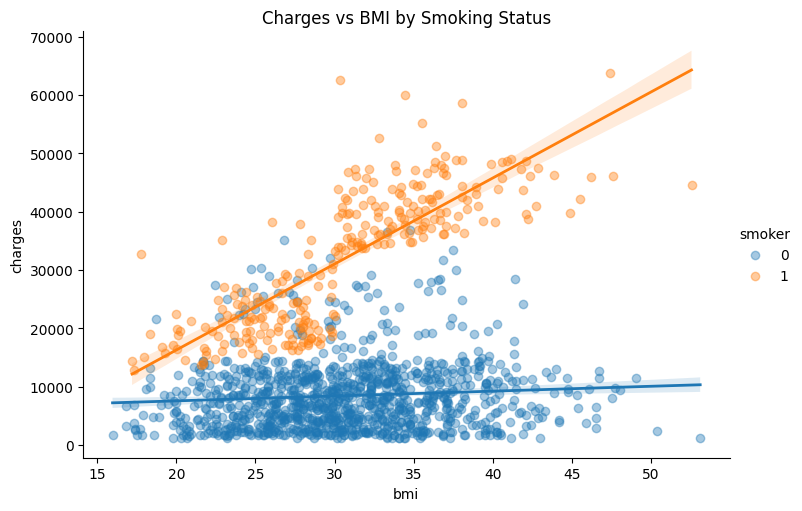

In [137]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df,
           aspect=1.5, scatter_kws={"alpha":0.4}, line_kws={"lw":2})
plt.title("Charges vs BMI by Smoking Status")
plt.show()
